In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import seaborn as sns

In [2]:
performance_df = pd.read_csv("data/student_performance.csv", index_col=0)
performance_df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [3]:
test_df = pd.read_csv("data/test_scores.csv", index_col=0)
test_df.head()

,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
school,,,,,,,,,,
ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
performance_df.groupby("parental level of education")['math percentage', 'reading score percentage', 'writing score percentage'].count().sort_values(by=['math percentage'], ascending=False)

/var/folders/fq/tfk0nhl51mqg7vv9rwk8l3bc0000gn/T/ipykernel_42755/1052798071.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  performance_df.groupby("parental level of education")['math percentage', 'reading score percentage', 'writing score percentage'].count().sort_values(by=['math percentage'], ascending=False)


,math percentage,reading score percentage,writing score percentage
parental level of education,,,
some college,226,226,226
associate's degree,222,222,222
high school,196,196,196
some high school,179,179,179
bachelor's degree,118,118,118
master's degree,59,59,59


Text(0.5, 1.0, 'Count of Parental Education Level')

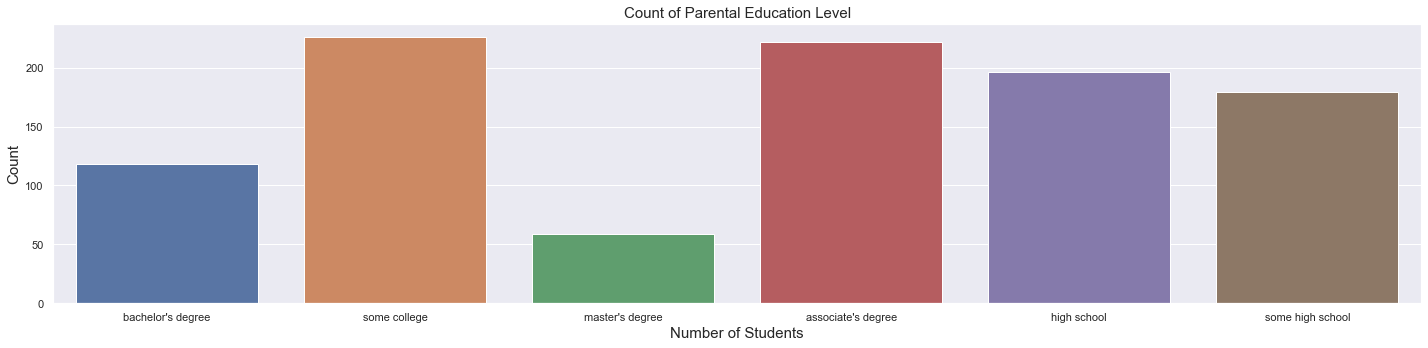

In [43]:
education_plot = sns.countplot(x="parental level of education", data=performance_df)
#education_plot.set(xlabel = "Parental Level of Education", ylabel = "Count", title = "Count of Parental Education Level")
education_plot.set_xlabel("Number of Students", fontsize = 15)
education_plot.set_ylabel("Count", fontsize = 15)
education_plot.set_title("Count of Parental Education Level", fontsize=15)

In [6]:
performance_df.groupby("parental level of education").mean()

,math percentage,reading score percentage,writing score percentage
parental level of education,,,
associate's degree,0.678829,0.709279,0.698964
bachelor's degree,0.693898,0.730000,0.733814
high school,0.621378,0.647041,0.624490
master's degree,0.697458,0.753729,0.756780
some college,0.671283,0.694602,0.688407
some high school,0.634972,0.669385,0.648883


In [7]:
performance_df.groupby("parental level of education").median()

,math percentage,reading score percentage,writing score percentage
parental level of education,,,
associate's degree,0.670,0.725,0.705
bachelor's degree,0.680,0.730,0.740
high school,0.630,0.660,0.640
master's degree,0.730,0.760,0.750
some college,0.675,0.705,0.700
some high school,0.650,0.670,0.660


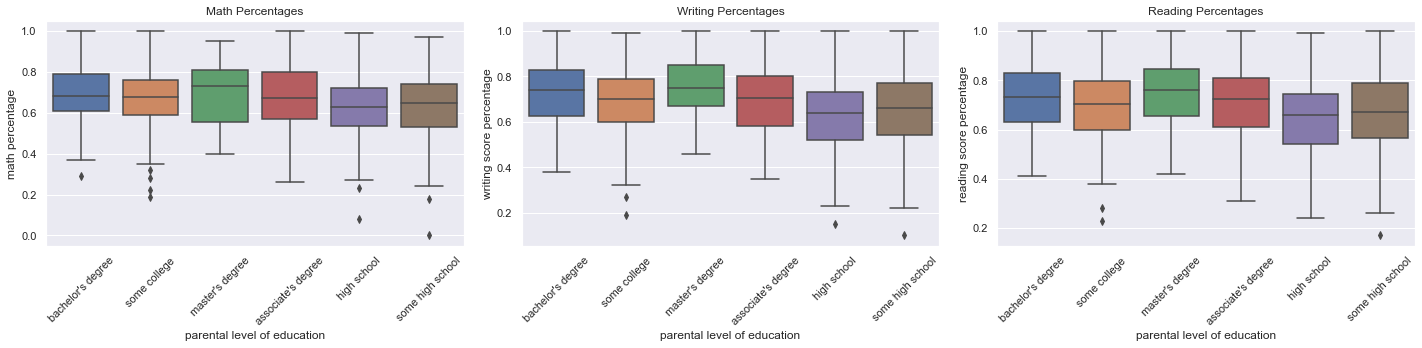

In [8]:
plt.rcParams["figure.figsize"] = [20.00, 5.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
math = sns.boxplot(x='parental level of education', y= 'math percentage', data = performance_df, ax=axes[0])
plt.setp(math.get_xticklabels(), rotation=45)
math.set_title("Math Percentages")
writing = sns.boxplot(x='parental level of education', y= 'writing score percentage', data = performance_df, ax=axes[1])
plt.setp(writing.get_xticklabels(), rotation=45)
writing.set_title("Writing Percentages")
reading = sns.boxplot(x='parental level of education', y= 'reading score percentage', data = performance_df, ax=axes[2])
plt.setp(reading.get_xticklabels(), rotation=45)
reading.set_title("Reading Percentages")
plt.show()

In [9]:
math_perc = performance_df[['parental level of education', 'math percentage']]
math_perc['category'] = 'math'
math_perc = math_perc.rename(columns={"math percentage": "score"})
read_perc = performance_df[['parental level of education', 'reading score percentage']]
read_perc['category'] = 'read'
read_perc = read_perc.rename(columns={"reading score percentage": "score"})
write_perc = performance_df[['parental level of education', 'writing score percentage']]
write_perc['category'] = 'write'
write_perc = write_perc.rename(columns={"writing score percentage": "score"})


/var/folders/fq/tfk0nhl51mqg7vv9rwk8l3bc0000gn/T/ipykernel_42755/1428374187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_perc['category'] = 'math'
/var/folders/fq/tfk0nhl51mqg7vv9rwk8l3bc0000gn/T/ipykernel_42755/1428374187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_perc['category'] = 'read'
/var/folders/fq/tfk0nhl51mqg7vv9rwk8l3bc0000gn/T/ipykernel_42755/1428374187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [10]:
read_perc.head()

,parental level of education,score,category
0,bachelor's degree,0.72,read
1,some college,0.90,read
2,master's degree,0.95,read
3,associate's degree,0.57,read
4,some college,0.78,read


In [11]:
write_perc.head()

,parental level of education,score,category
0,bachelor's degree,0.74,write
1,some college,0.88,write
2,master's degree,0.93,write
3,associate's degree,0.44,write
4,some college,0.75,write


In [16]:
math_perc.head()

,parental level of education,score,category
0,bachelor's degree,0.72,math
1,some college,0.69,math
2,master's degree,0.90,math
3,associate's degree,0.47,math
4,some college,0.76,math


In [17]:


final_1 = math_perc.merge(read_perc, on=['parental level of education','score', 'category'])
final_1.head()


,parental level of education,score,category


In [18]:

final_2.shape
final_2.head()

NameError: name 'final_2' is not defined

In [19]:
test_df.groupby("school_type").mean()

,n_student,pretest,posttest
school_type,,,
Non-public,18.869328,63.254083,75.961887
Public,24.164349,52.065740,64.016435


In [20]:
test_df.groupby('lunch').count()

,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,pretest,posttest
lunch,,,,,,,,,
Does not qualify,1215,1215,1215,1215,1215,1215,1215,1215,1215
Qualifies for reduced/free lunch,918,918,918,918,918,918,918,918,918


In [21]:
performance_df.groupby('lunch').count()

,race/ethnicity,parental level of education,test preparation course,math percentage,reading score percentage,writing score percentage,sex
lunch,,,,,,,
free/reduced,355,355,355,355,355,355,355
standard,645,645,645,645,645,645,645


In [22]:
test_df.groupby("lunch").mean().drop(columns=['n_student'])

,pretest,posttest
lunch,,
Does not qualify,62.292181,74.375309
Qualifies for reduced/free lunch,45.246187,57.476035


In [23]:
performance_df.groupby("lunch").mean()

,math percentage,reading score percentage,writing score percentage
lunch,,,
free/reduced,0.589211,0.646535,0.630225
standard,0.700341,0.716543,0.708233


In [24]:
performance_df.groupby("lunch").count()

,race/ethnicity,parental level of education,test preparation course,math percentage,reading score percentage,writing score percentage,sex
lunch,,,,,,,
free/reduced,355,355,355,355,355,355,355
standard,645,645,645,645,645,645,645


In [25]:
from scipy import stats

In [26]:
 doesnt_qualify = test_df[test_df["lunch"]=='Does not qualify']

In [27]:
qualify_lunch = test_df[test_df["lunch"]=='Qualifies for reduced/free lunch']

In [28]:
stats.ttest_ind(doesnt_qualify['pretest'], qualify_lunch['pretest'])[1]

4.73088586814998e-229

In [29]:
stats.ttest_ind(doesnt_qualify['posttest'], qualify_lunch['posttest'])[1]

2.2616015547526212e-207

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = performance_df.drop(columns=["race/ethnicity", 'parental level of education', 'test preparation course', 'sex', 'lunch'])
target = performance_df["lunch"]
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)

Accuracy score: 0.6771428571428572


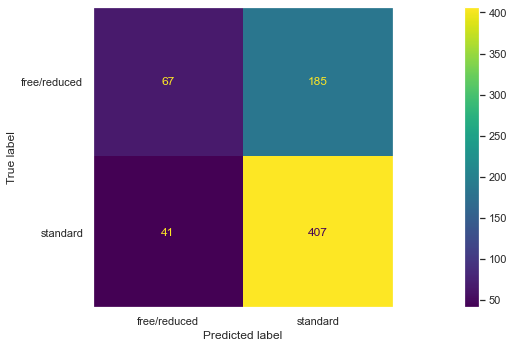

In [31]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X=train_data, y=train_target)

predict = logistic_model.predict(test_data)
print("Accuracy score:", accuracy_score(test_target, predict))

plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [32]:
standard = performance_df[performance_df["lunch"]=='standard']

In [33]:
free_reduced = performance_df[performance_df["lunch"]=='free/reduced']

In [34]:
stats.ttest_ind(standard['math percentage'], free_reduced['math percentage'])[1]

2.4131955993132934e-30

In [35]:
stats.ttest_ind(standard['reading score percentage'], free_reduced['reading score percentage'])[1]

2.0027966545279229e-13

In [36]:
stats.ttest_ind(standard['writing score percentage'], free_reduced['writing score percentage'])[1]

3.186189583166408e-15

In [37]:
data = test_df[['pretest', 'posttest']].values
target = test_df["lunch"]
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)

Accuracy score: 0.7603748326639893


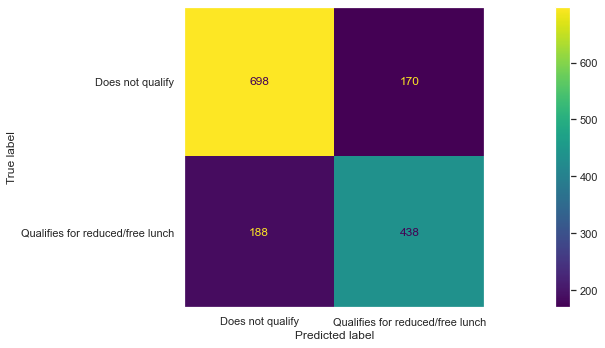

In [38]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X=train_data, y=train_target)

predict = logistic_model.predict(test_data)
print("Accuracy score:", accuracy_score(test_target, predict))

plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)